## PART 1

- Bayes’ Theorem shows us how to turn P(E|H) to P(H|E), with E=Evidence and H=Hypothesis. But what does that really mean? Imagine you have to explain this to someone who doesn't understand machine learning or probability at all.
 
__INSTRUCTIONS__

Explain how to turn P(E|H) to P(H|E), with E=Evidence and H=Hypothesis in layman's terms.<br>
Your explanation should be no more than two paragraphs.<br>
Use an example from real life to ground the explanation.<br>


P(E|H) Probability of Evidence given the Hypothesis <br>

Imagine that in our inbox, we receive emails from friends and family __(ff)__ as well as unsolicited spam __(S)__ emails.  We want to filter out the __S__, so the first thing we can do is to look at how the emails are constructed to see if there might be words or phrases that appear in __S__ versus those that appear in __ff__. (__ff__). We do this by looking at each instance of a discrete (unique) word over a series of __ff__ emails and calculating the liklihoods of that word being used in the __ff__ email as well as doing this for __S__ emails. Assuming in this example, we have 20 __ff__ emails and 10 __S__ emails, we could break this down below.<br>
<br>

The P(E) Evidence is given: 
- p(Hi | __ff__) = 11/20 = 0.55
- p(Amiga | __ff__) = 10/20 = 0.5
- p(Weather | __ff__) = 6/20 = 0.15
- p(Winning | __ff__) = 1/20 = 0.05 <br><hr>
These same words are counted in the __S__ emails. 
- p(Hi | __S__) = 4/10 = 0.4
- p(Amiga | __S__) = 0/10 = 0.0
- p(Weather | __S__) = 1/10 = 0.1
- p(Winning | __S__) = 7/10 = 0.7<br><br>
The E represents our estimated liklihood that an email is a __ff__ or __S__ which in this example, we know that 10 out of 20 emails were spam.  We make our estimate based on our evidence of what we see in our inbox. We can calcuate this:<br><br>
p(E) = 20 __ff__ emails divided by 20 __ff__ emails + 10 __S__ emails = 67 % liklihood that we will get a __ff__ email in our inbox.  <br>
p(E) = 10 __S__ emails divided by 10 __S__ emails + 20 __ff__ emails = 33 % liklihood that we will get a __S__ email in our inbox.  <br><hr>
The liklihood (probability) of receiving an email with "Hi amiga" is calculated by taking the liklihood of receiving a <b>ff</b> email which we calculated above as 67% multiplied times the lilihood of the use use of <b>"Hi"</b> multiplied times the use of <b>"amiga" </b>and this gives us a calculated probability based on the evidence we have given our hypothesis<br><br>
- p(<b>ff</b> ) | Hi Amiga) = <br>
- p(<b>ff</b> ) <b>X</b> p(Hi) <b>X</b>  p(Amiga) = .67 <b>X</b>  =  .55 <b>X</b>  .5 = 0.2% <br><hr>

The liklihood (probability) of receiving an email with "Hi amiga" can also be calculated by taking the liklihood of receiving a <b>S</b> email which we calculated above as 33% multiplied times the lilihood of the use use of <b>"Hi"</b> multiplied times the use of <b>"amiga" </b>and this gives us a calculated probability based on the evidence we have given our hypothesis<br>

- p(<b>S</b> ) | Hi Amiga) = <br>
- p(<b>S</b> ) <b>X</b> p(Hi) <b>X</b>  p(Amiga) = .33 <b>X</b>  =  .4 <b>X</b>  .0 = 0% <br><br>

<b>NOW</b>, given that we have the probabilites based on our evidence to form our hypothesis, we can test this as the probability of our hypothesis based on our evidence.  Assuming we received an new email, we could calculate whether we believe it will be <b>S</b> or <b>ff</b> by applying the probabilities we calculated for the words in the email.  Assuming the email contained the word, "<b>Amiga</b>", the liklihood that this email is <b>S</b> is 0% because anything times 0 equals 0 and we saw above that there was a 0% chance that emails containing "<b>Amiga</b>" were <b>S</b>.

In [107]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

## PART 2 
__INSTRUCTIONS__<br>
For this exercise use any four of these five datasets to build a spam filter with the Naïve Bayes approach. <br>
Use that filter to check the accuracy of the remaining dataset.<br>
Make sure to report the details of your training and the model.<br>


In [33]:
Psy = pd.read_csv('/Users/jennyskytta/Desktop/YTPsy.csv')
Psy.shape #Dataset 1 to be combined 

(350, 5)

In [34]:
KatyPerry = pd.read_csv('/Users/jennyskytta/Desktop/YTKatyPerry.csv')
KatyPerry.shape # Dataset 2 to be combined

(350, 5)

In [35]:
LMFAO = pd.read_csv('/Users/jennyskytta/Desktop/YTLMFAO.csv')
LMFAO.shape #Dateset 3 to be combined

(438, 5)

In [36]:
Eminem = pd.read_csv('/Users/jennyskytta/Desktop/YTEminem.csv')
Eminem.shape  #Dataset 4 to be combined

(448, 5)

In [97]:
Shakira = pd.read_csv('/Users/jennyskytta/Desktop/YTShakira.csv')
Shakira.drop(['COMMENT_ID','AUTHOR', 'DATE'], axis=1, inplace=True)
Shakira.shape  #Dataset for testing 

(370, 2)

In [86]:
ST = pd.concat([Psy, KatyPerry,LMFAO, Eminem]) 
# removing the columns that aren't needed 
ST.drop(['COMMENT_ID','AUTHOR', 'DATE'], axis=1, inplace=True)
ST.sample(10) # viewing sample

,CONTENT,CLASS
162,Good times. ﻿,0
232,She is good. Does she make any more music? If ...,0
431,EVERYONE PLEASE SUBSCRIBE TO MY CHANNEL OR CAN...,1
8,You should check my channel for Funny VIDEOS!!﻿,1
359,Love the way you lie II is nicer in my opinion...,0
46,Love😘❤💖﻿,0
130,Can somebody wake me up when we get to 3 billi...,0
13,2011- the last year of decent music.﻿,0
424,Simply rap god﻿,0
335,curti? click here ? https://www.facebook.com/...,1


In [87]:
# creating our training test split
Xt, Xv, yt, yv = train_test_split(ST['CONTENT'], ST['CLASS'])

In [88]:
tfidf_vect = TfidfVectorizer(use_idf=True, lowercase=True)
Xt_tfidf = tfidf_vect.fit_transform(Xt)
Xt_tfidf.shape

(1189, 3210)

In [89]:
m = MultinomialNB(alpha=0) #setting at zero to purposely demonstrate improvement
m.fit(Xt_tfidf, yt)

/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


MultinomialNB(alpha=0)

In [90]:
# applying the same variable vectorization on our training set 
x_test_tfidf = tfidf_vect.transform(Xv)
predictspam = m.predict(x_test_tfidf) # 0 say Ham / 1 say Spam

In [91]:
confusion_matrix(yv, predictspam)  # majority are accurately predicted

array([[140,  46],
       [ 15, 196]])

In [92]:
print(classification_report(yv, predictspam))  # 86% accurate - not great 

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       186
           1       0.81      0.93      0.87       211

    accuracy                           0.85       397
   macro avg       0.86      0.84      0.84       397
weighted avg       0.85      0.85      0.84       397



In [93]:
m.score(x_test_tfidf, yv)

0.8463476070528967

In Viewing the DF, we can see that there are lots of links and symbols that will make the data really difficult to fit 'as-is' so I will try to clean it up by parsing messages out to remove symbols and odd syntax.

In [94]:
# we can make a loop over different alphas to decide which one is best 

alphas = 10**np.linspace(-8,1,15)
alphas

array([1.00000000e-08, 4.39397056e-08, 1.93069773e-07, 8.48342898e-07,
       3.72759372e-06, 1.63789371e-05, 7.19685673e-05, 3.16227766e-04,
       1.38949549e-03, 6.10540230e-03, 2.68269580e-02, 1.17876863e-01,
       5.17947468e-01, 2.27584593e+00, 1.00000000e+01])

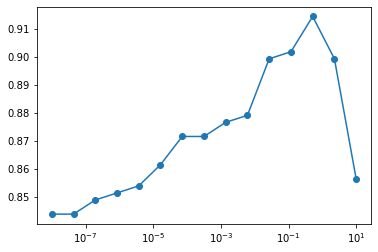

In [95]:
alphas = 10**np.linspace(-8,1,15)
scores = []
for alpha in alphas:
    m = MultinomialNB(alpha=alpha)
    m.fit(Xt_tfidf, yt)
    scores.append(m.score(x_test_tfidf, yv))
    
plt.plot(alphas, scores, marker="o")
plt.xscale("log")

In [100]:
m = MultinomialNB(alpha=0.5) #setting at zero to purposely demonstrate improvement
m.fit(Xt_tfidf, yt)
x_test_tfidf = tfidf_vect.transform(Xv)
predictspam = m.predict(x_test_tfidf) # 0 say Ham / 1 say Spam
print(confusion_matrix(yv, predictspam))
print(classification_report(yv, predictspam))  # improves to 91%

[[165  21]
 [ 13 198]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       186
           1       0.90      0.94      0.92       211

    accuracy                           0.91       397
   macro avg       0.92      0.91      0.91       397
weighted avg       0.91      0.91      0.91       397



__Using the 5th dataset for testing the model, I'll assess accuracy.  As you see below, the model predicts at about 88% accuracy which messages are spam vs. ham.__

In [101]:
XShaktest = Shakira['CONTENT']
yShaktest = Shakira['CLASS']
shakira_test = tfidf_vect.transform(XShaktest)
predictspam2 = m.predict(shakira_test) 
print(confusion_matrix(yShaktest, predictspam2))
print(classification_report(yShaktest, predictspam2)) # 88% accuracy 

[[168  28]
 [ 16 158]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       196
           1       0.85      0.91      0.88       174

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370



In [105]:
Shakira.sample(10, random_state=123) 

,CONTENT,CLASS
59,My friend Sam loves this song😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊...,0
245,She is perfect! &lt;3,0
9,I like shakira..﻿,0
300,Hello everyone :) I know most of you probably ...,1
291,WAYS TO MAKE MONEY 50k Per Month Search google...,1
156,Pleas subscribe GamezZ MTA my channel<br />﻿,1
170,I really love watching football and also I’ve ...,1
79,&lt;3 this song so much.SHAKIRA YOUR A REALLY ...,0
165,PLEASSSSSSSSSSSSSSSS SUBSCRIBEEEEEEEEEE MY CHA...,1
231,"Haha , Miley Cyrus has done it once again T...",1


In viewing a sample above, it does appear that with 0 representing Ham and 1 representing Spam, the CLASS column is accurately capturing the information from the above example. In rows 59, 245, 9, 79, we see the comments are specifically addressing Shakira or seem to apply to Shakira. The other comments appear to be completely incongruent.